In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [3]:
#results/2jul2018/
burn_vc = pd.read_csv('../trainset_3_fissact_burnup_validation_curve.csv')
enri_vc = pd.read_csv('../trainset_3_fissact_enrichment_validation_curve.csv')
cool_vc = pd.read_csv('../trainset_3_fissact_cooling_validation_curve.csv')
rxtr_vc = pd.read_csv('../trainset_3_fissact_reactor_validation_curve.csv')

In [4]:
burn_vc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_vc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_vc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_vc.loc[:, 'Parameter'] = 'Reactor Type'

In [5]:
burn_vc.sample(10)

,Unnamed: 0,ParamList,TrainScore,CV-Score,Algorithm,Parameter
27,7,0.021544,0.981612,0.981282,svr,Burnup [MWd/MTU]
23,3,0.001000,0.987440,0.987411,svr,Burnup [MWd/MTU]
15,5,27.825594,0.989425,0.989373,rr,Burnup [MWd/MTU]
12,2,0.059948,0.989860,0.989784,rr,Burnup [MWd/MTU]
18,8,12915.496650,0.987231,0.987203,rr,Burnup [MWd/MTU]
25,5,0.004642,0.986423,0.986313,svr,Burnup [MWd/MTU]
19,9,100000.000000,0.961354,0.961337,rr,Burnup [MWd/MTU]
1,1,5.000000,0.999999,0.995515,knn,Burnup [MWd/MTU]
2,2,9.000000,0.999999,0.995374,knn,Burnup [MWd/MTU]
26,6,0.010000,0.984670,0.984445,svr,Burnup [MWd/MTU]


# Training Set 1
## kNN
### Explained Variance/Accuracy

In [6]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn')]# & (burn_vc['ScoringMetric']=='explained_variance')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn')]# & (enri_vc['ScoringMetric']=='explained_variance')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn')]# & (cool_vc['ScoringMetric']=='explained_variance')]
knn_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='knn')]# & (rxtr_vc['ScoringMetric']=='accuracy')]

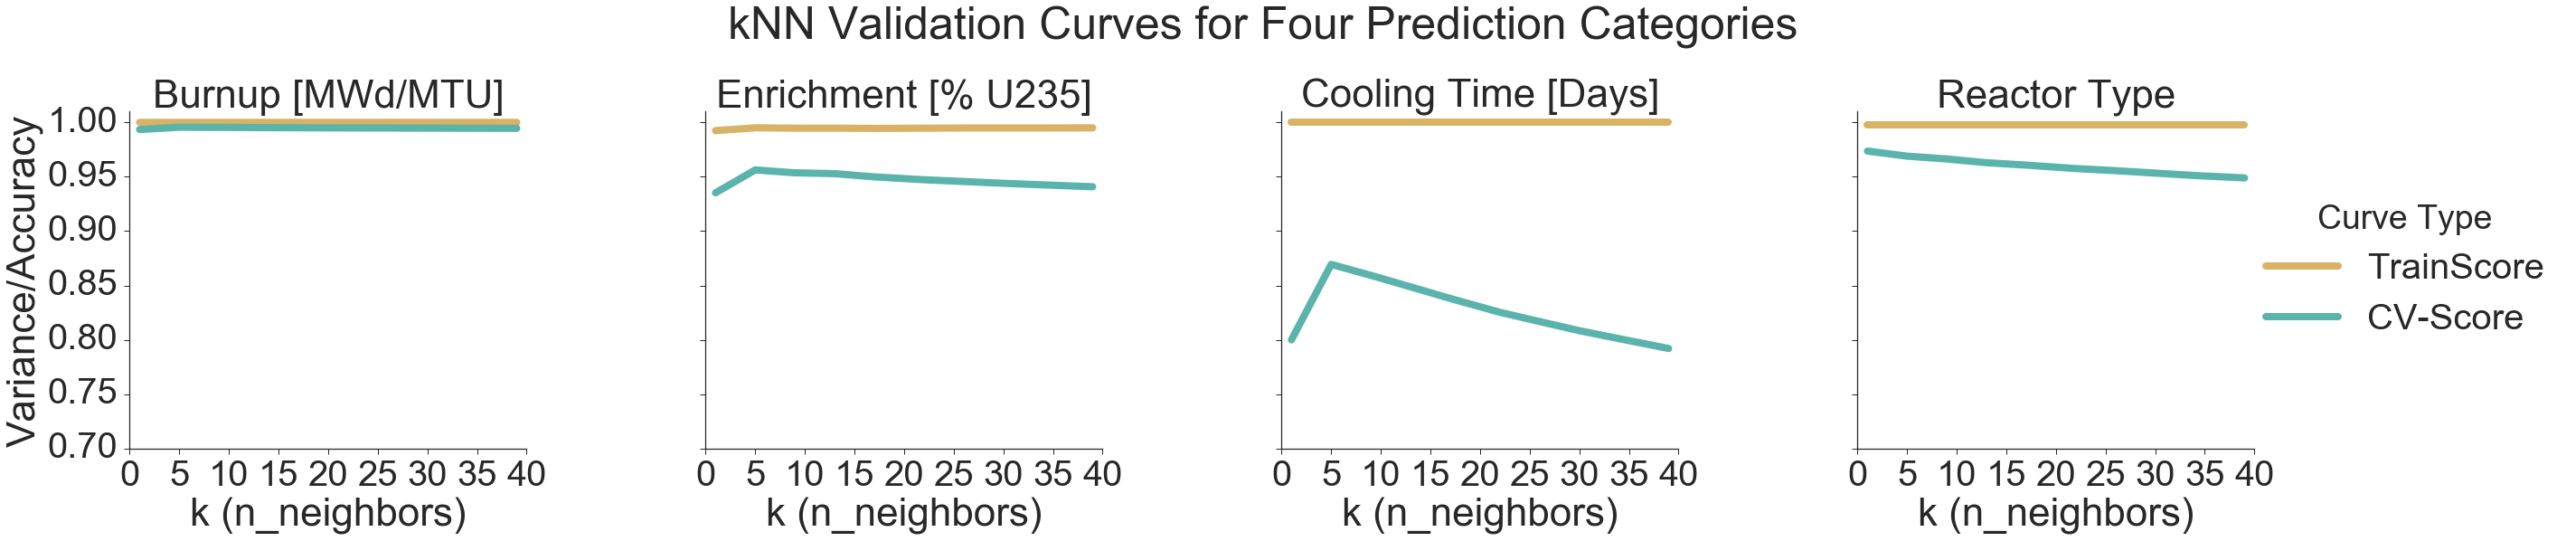

In [10]:
plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c, knn_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Variance/Accuracy')
   .set(ylim=(0.7, 1.01))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

#vc.savefig('../results/22jul2018/graphs/3knn_fissact_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

In [83]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn')] (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn')] (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn')] (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

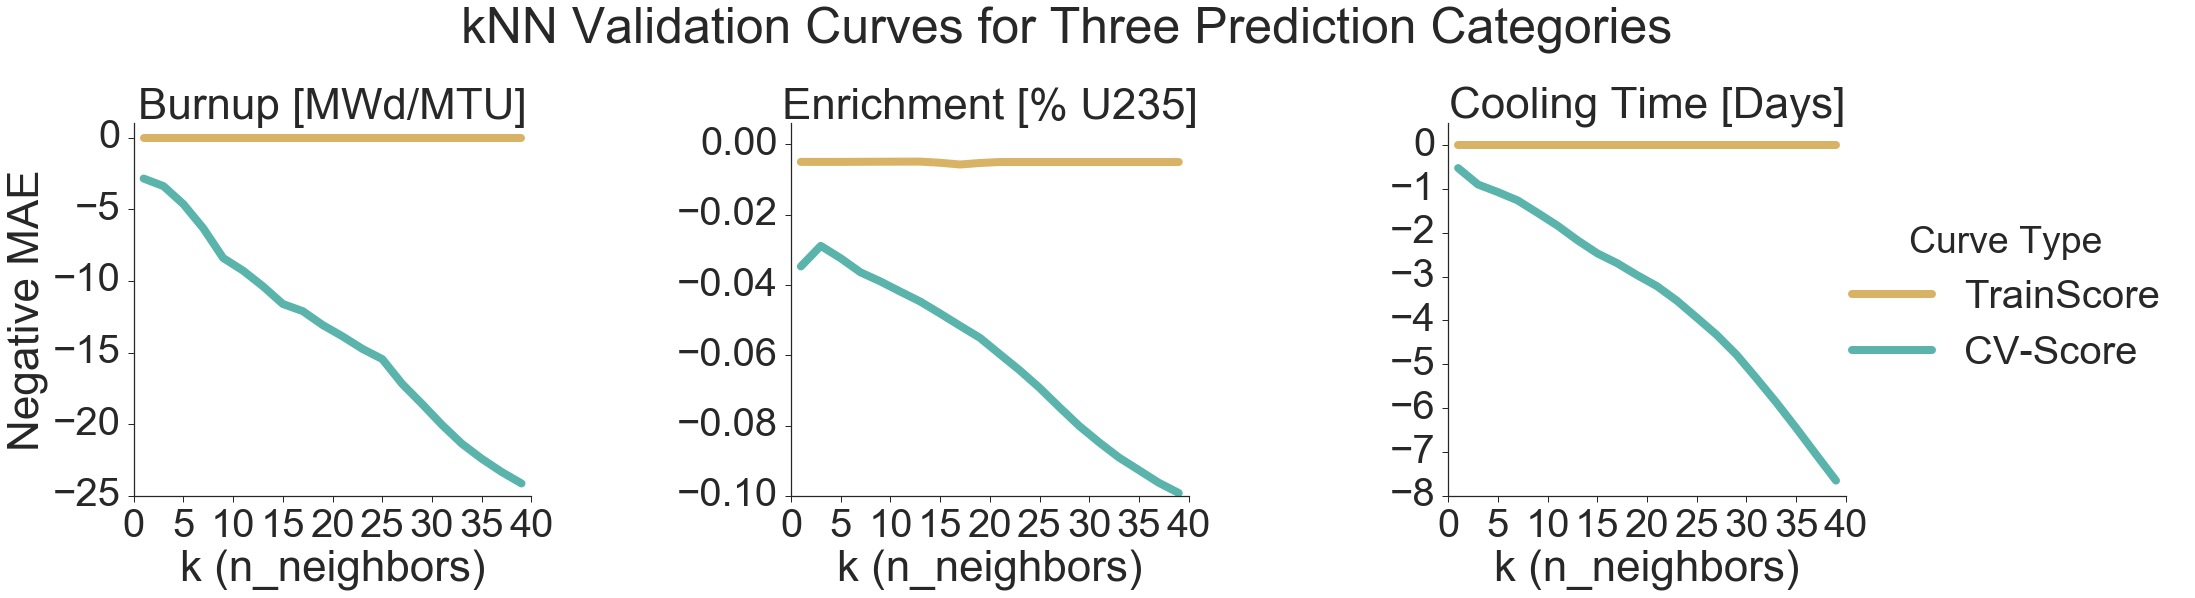

In [88]:
plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Negative MAE')
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
#vc.axes[0,0].set_ylim(-25, 1)
#vc.axes[0,1].set_ylim(-0.1, 0.006)
#vc.axes[0,2].set_ylim(-8, 0.5)

vc.savefig('../results/22jul2018/graphs/3knn_fissact_validation_mae.png', bbox_inches='tight', transparent=True)

## Ridge
### Explained Variance/Accuracy

In [11]:
rr_b = burn_vc.loc[(burn_vc['Algorithm']=='rr')]# & (burn_vc['ScoringMetric']=='explained_variance')]
rr_e = enri_vc.loc[(enri_vc['Algorithm']=='rr')]# & (enri_vc['ScoringMetric']=='explained_variance')]
rr_c = cool_vc.loc[(cool_vc['Algorithm']=='rr')]# & (cool_vc['ScoringMetric']=='explained_variance')]
rr_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='rr')]# & (rxtr_vc['ScoringMetric']=='accuracy')]

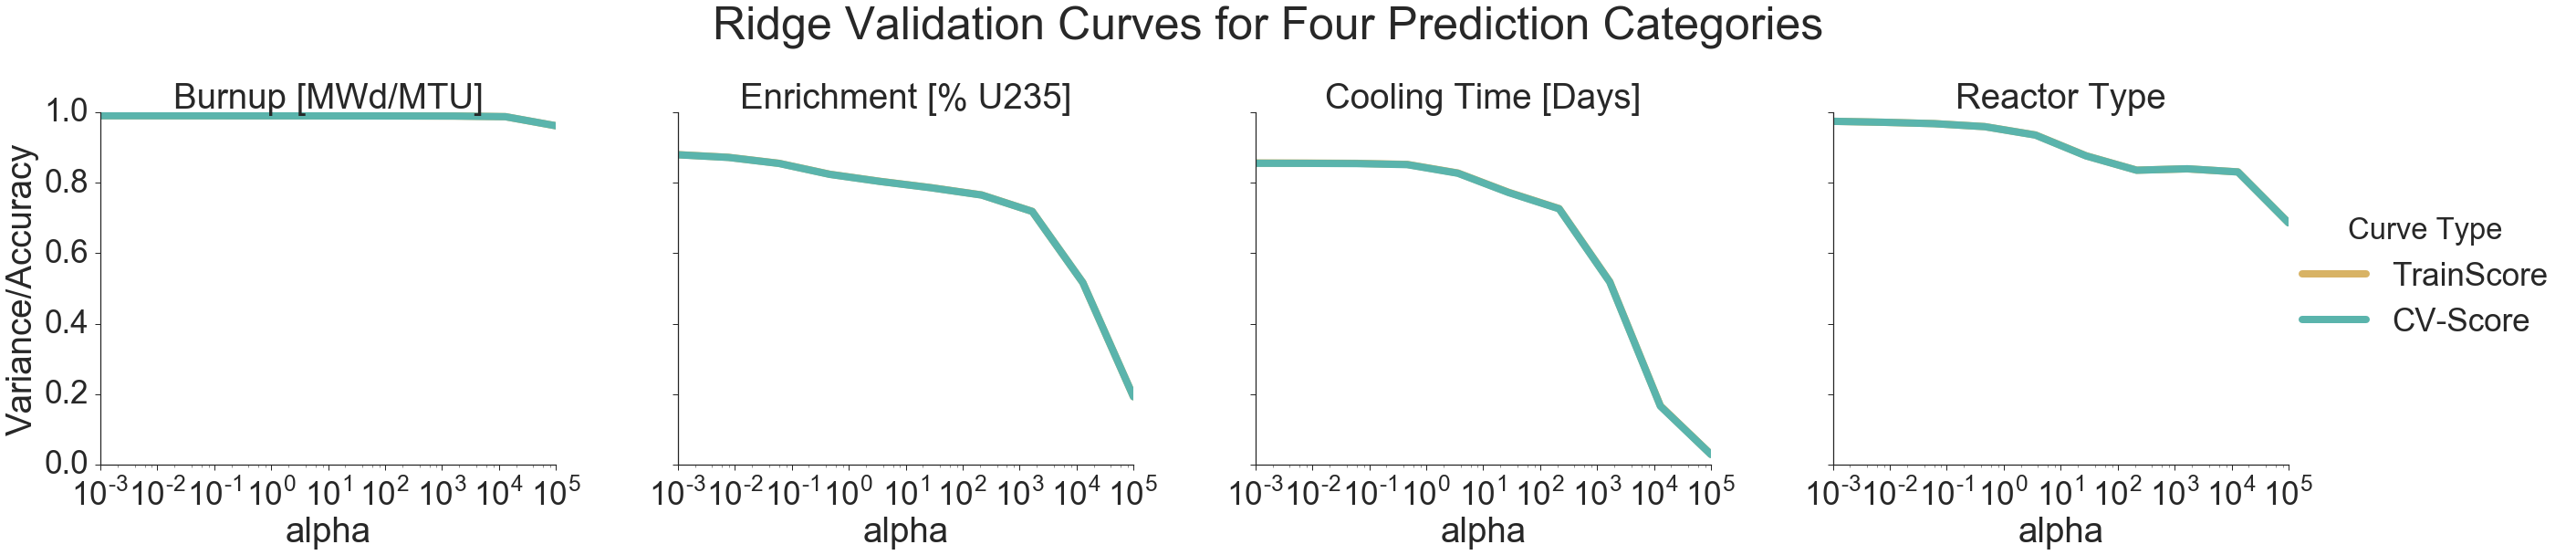

In [12]:
plt.clf()

sns.set(style="ticks", font_scale=3.5)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c, rr_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('alpha', 'Variance/Accuracy')
   .set(xscale="log")
   #.set(ylim=(0.6, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

#vc.savefig('../results/22jul2018/graphs/3rr_fissact_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

In [101]:
rr_b = burn_vc.loc[(burn_vc['Algorithm']=='rr') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
rr_e = enri_vc.loc[(enri_vc['Algorithm']=='rr') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
rr_c = cool_vc.loc[(cool_vc['Algorithm']=='rr') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

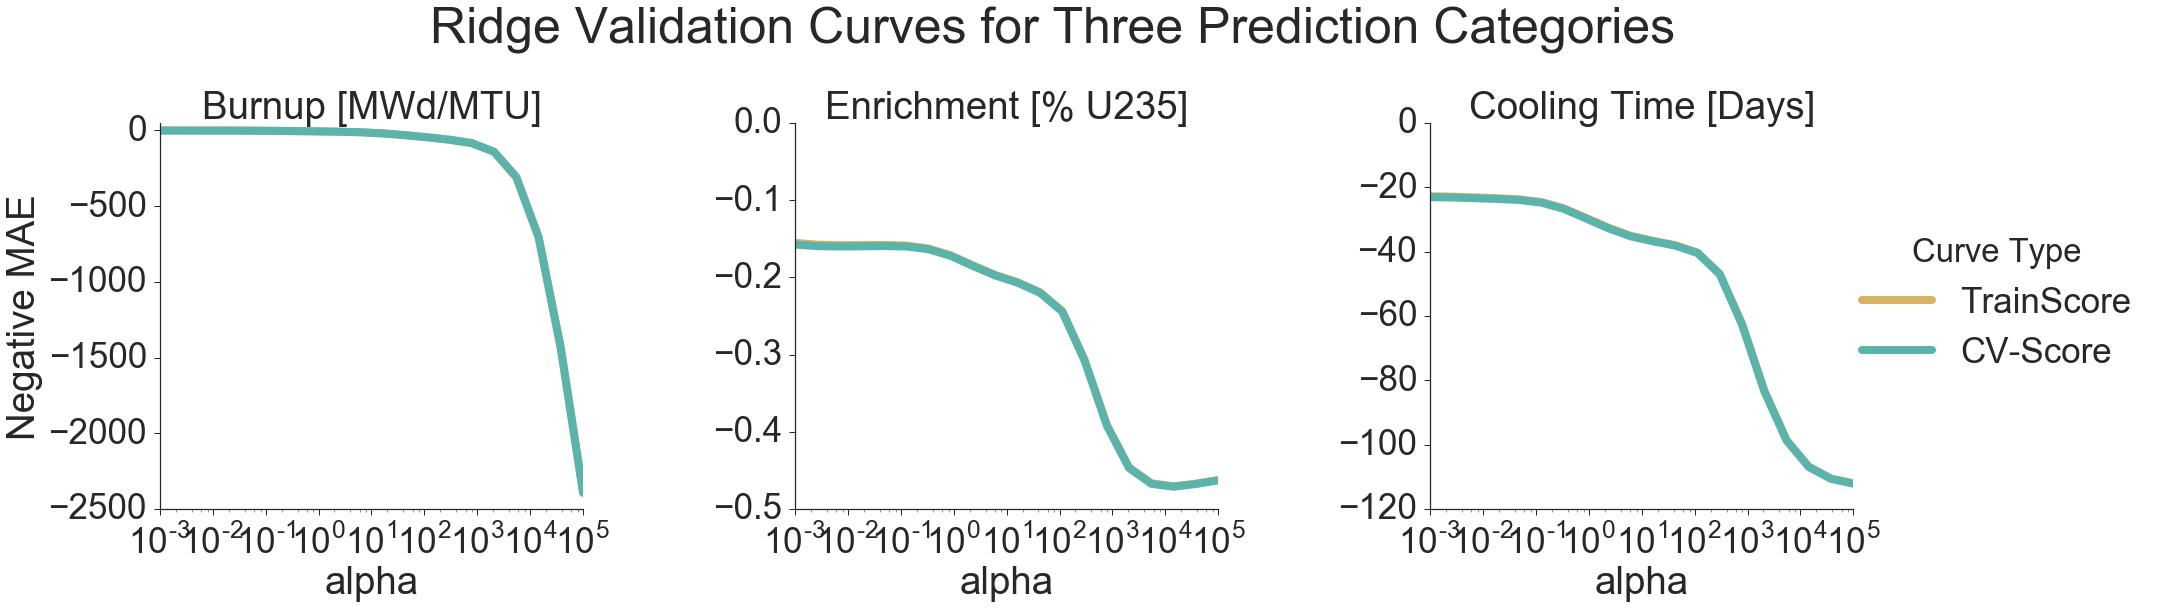

In [102]:
plt.clf()
sns.set(style="ticks", font_scale=3.5)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('alpha', 'Negative MAE')
   .set(xscale="log")
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-2500, 50)
vc.axes[0,1].set_ylim(-0.5, 0)
vc.axes[0,2].set_ylim(-120, 0)

vc.savefig('../results/2jul2018/graphs/1rr_fissact_validation_mae.png', bbox_inches='tight', transparent=True)

## SVR
### Explained Variance/Accuracy

In [13]:
svr_b = burn_vc.loc[(burn_vc['Algorithm']=='svr')]# & (burn_vc['ScoringMetric']=='explained_variance')]
svr_e = enri_vc.loc[(enri_vc['Algorithm']=='svr')]# & (enri_vc['ScoringMetric']=='explained_variance')]
svr_c = cool_vc.loc[(cool_vc['Algorithm']=='svr')]# & (cool_vc['ScoringMetric']=='explained_variance')]
svr_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='svr')]# & (rxtr_vc['ScoringMetric']=='accuracy')]

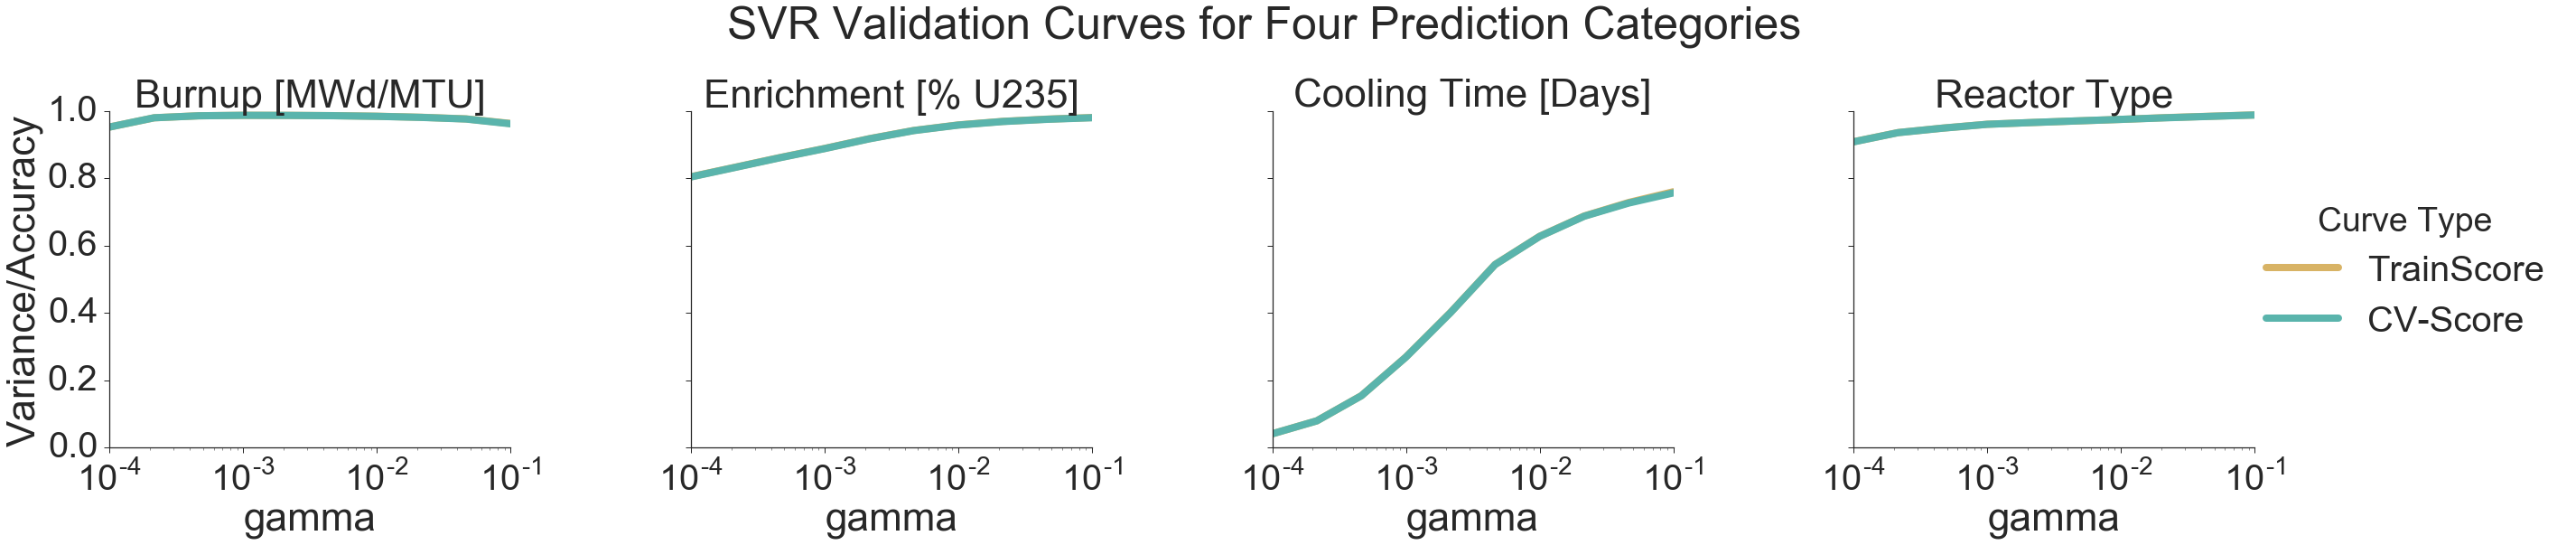

In [14]:
plt.clf()

sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c, svr_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('gamma', 'Variance/Accuracy')
   .set(xscale="log")
   #.set(ylim=(0.8, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('SVR Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

#vc.savefig('../results/22jul2018/graphs/3svr_fissact_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

In [114]:
svr_b = burn_vc.loc[(burn_vc['Algorithm']=='svr') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
svr_e = enri_vc.loc[(enri_vc['Algorithm']=='svr') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
svr_c = cool_vc.loc[(cool_vc['Algorithm']=='svr') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

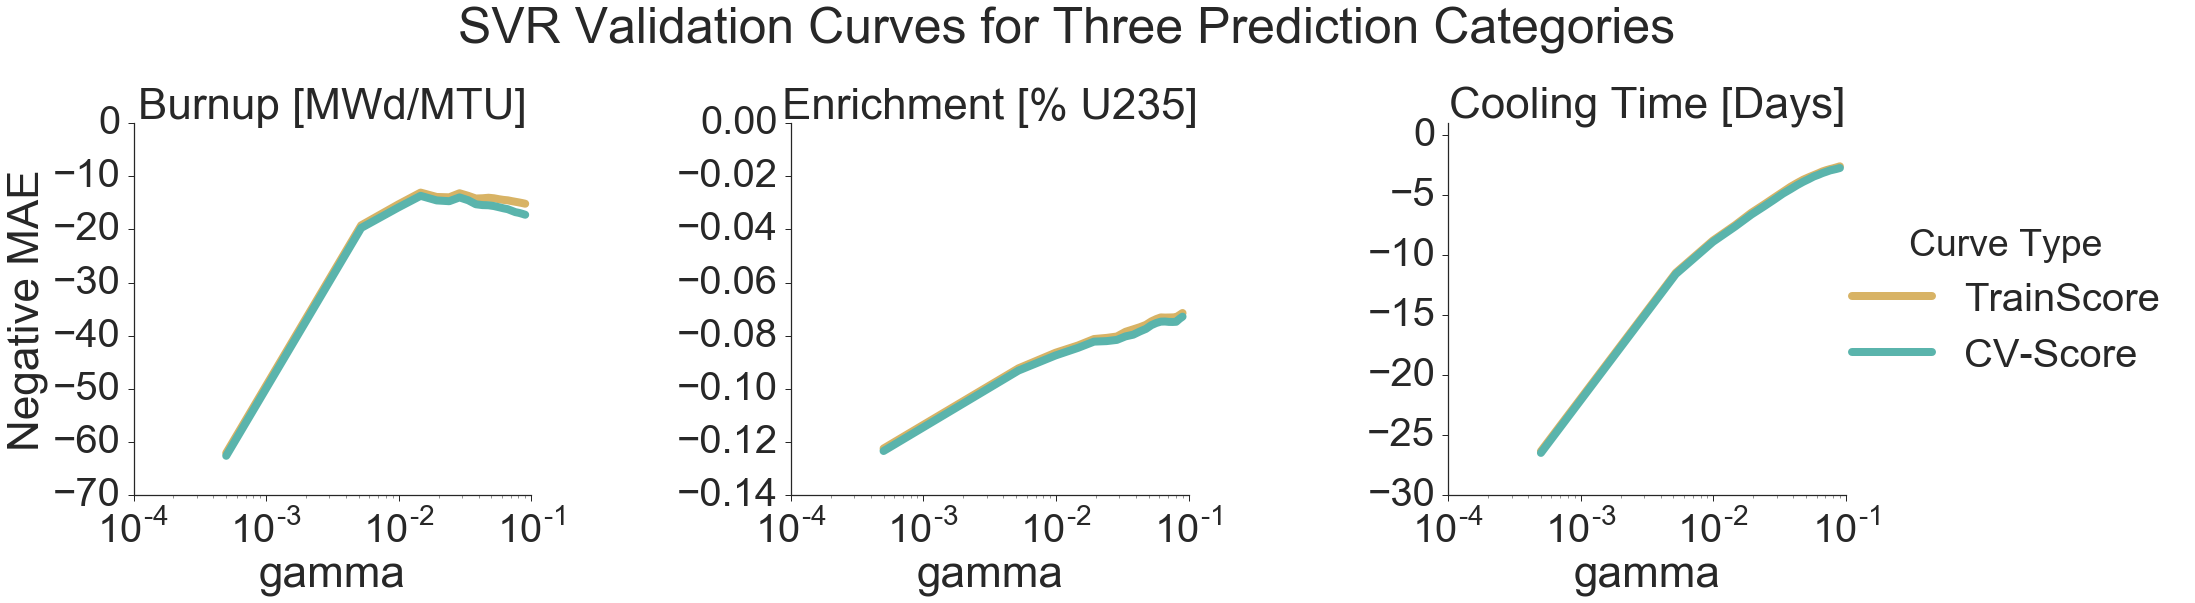

In [116]:
plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('gamma', 'Negative MAE')
   .set(xscale="log")
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('SVR Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-70, 0)
vc.axes[0,1].set_ylim(-0.14, 0)
vc.axes[0,2].set_ylim(-30, 1)

vc.savefig('../results/2jul2018/graphs/1svr_fissact_validation_mae.png', bbox_inches='tight', transparent=True)

# Training Set 2
## kNN
### Explained Variance/Accuracy

In [16]:
#results/2jul2018/
burn_vc = pd.read_csv('../results/2jul2018/trainset_2_fissact_burnup_validation_curve.csv')
enri_vc = pd.read_csv('../results/2jul2018/trainset_2_fissact_enrichment_validation_curve.csv')
cool_vc = pd.read_csv('../results/2jul2018/trainset_2_fissact_cooling_validation_curve.csv')
rxtr_vc = pd.read_csv('../results/2jul2018/trainset_2_fissact_reactor_validation_curve.csv')

In [17]:
burn_vc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_vc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_vc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_vc.loc[:, 'Parameter'] = 'Reactor Type'

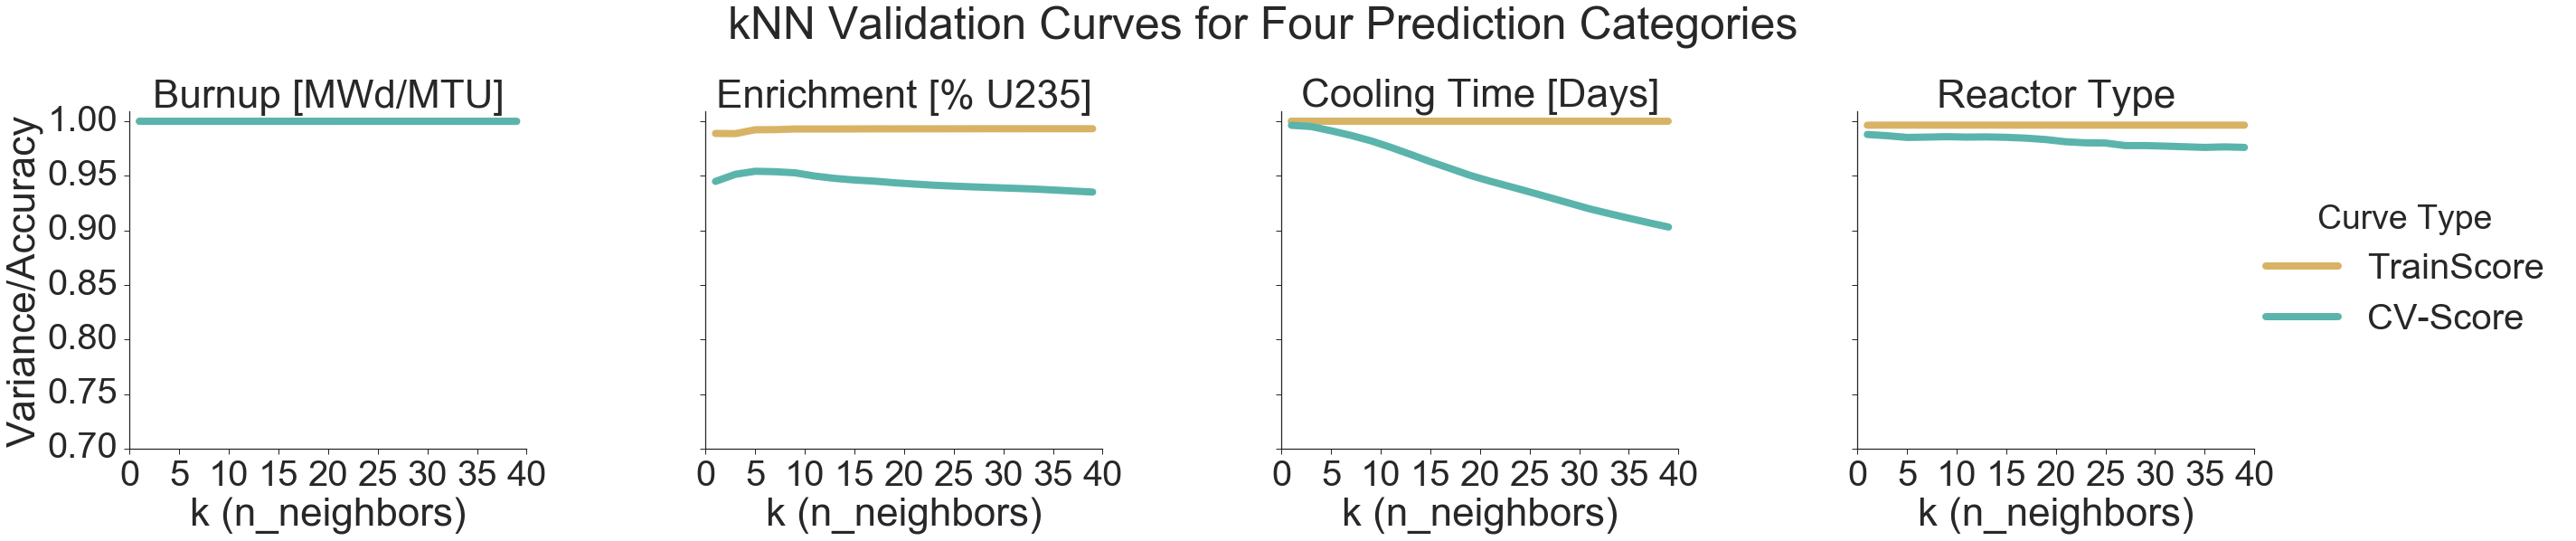

In [19]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn') & (burn_vc['ScoringMetric']=='explained_variance')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn') & (enri_vc['ScoringMetric']=='explained_variance')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn') & (cool_vc['ScoringMetric']=='explained_variance')]
knn_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='knn') & (rxtr_vc['ScoringMetric']=='accuracy')]

plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c, knn_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Variance/Accuracy')
   .set(ylim=(0.7, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/2jul2018/graphs/2knn_fissact_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

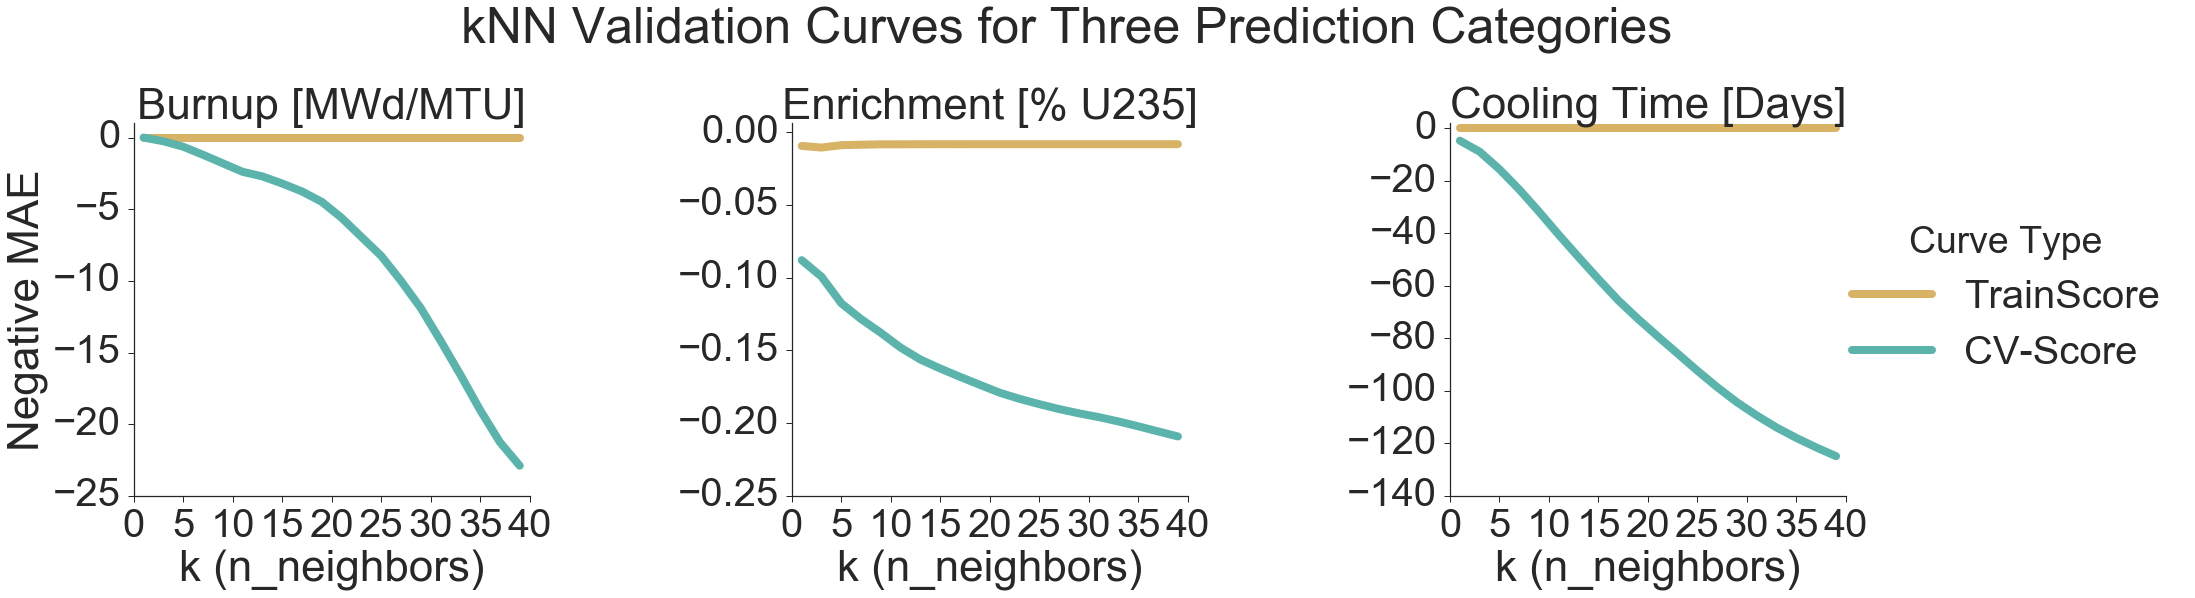

In [124]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Negative MAE')
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-25, 1)
vc.axes[0,1].set_ylim(-0.25, 0.006)
vc.axes[0,2].set_ylim(-140, 2)

vc.savefig('../results/2jul2018/graphs/2knn_fissact_validation_mae.png', bbox_inches='tight', transparent=True)

## Ridge
### Explained Variance/Accuracy

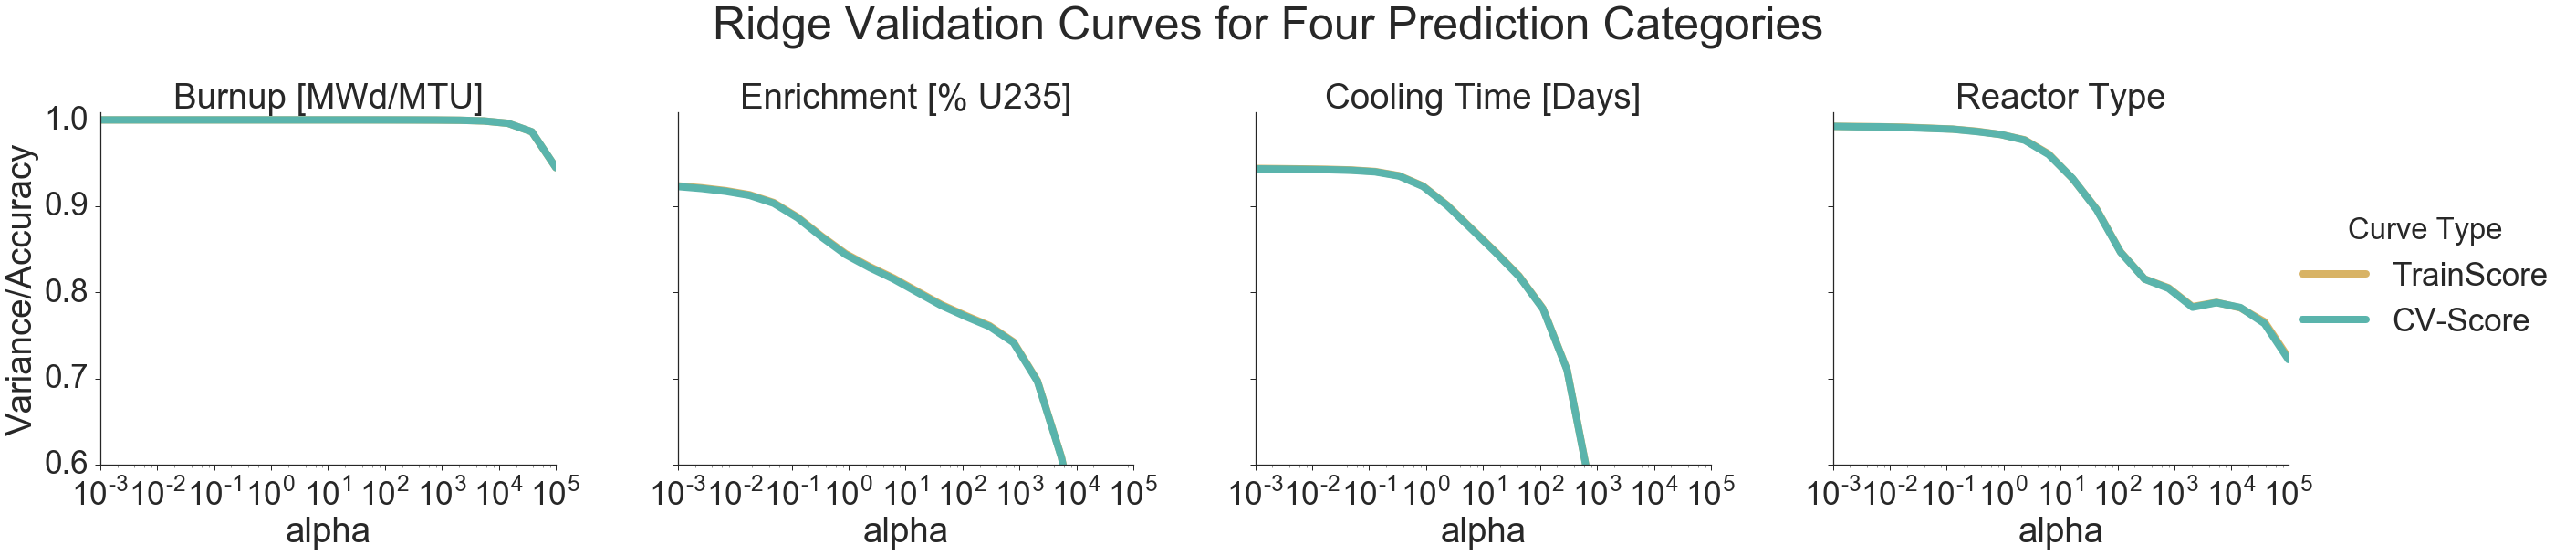

In [127]:
rr_b = burn_vc.loc[(burn_vc['Algorithm']=='rr') & (burn_vc['ScoringMetric']=='explained_variance')]
rr_e = enri_vc.loc[(enri_vc['Algorithm']=='rr') & (enri_vc['ScoringMetric']=='explained_variance')]
rr_c = cool_vc.loc[(cool_vc['Algorithm']=='rr') & (cool_vc['ScoringMetric']=='explained_variance')]
rr_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='rr') & (rxtr_vc['ScoringMetric']=='accuracy')]

plt.clf()

sns.set(style="ticks", font_scale=3.5)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c, rr_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('alpha', 'Variance/Accuracy')
   .set(xscale="log")
   .set(ylim=(0.6, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/2jul2018/graphs/2rr_fissact_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

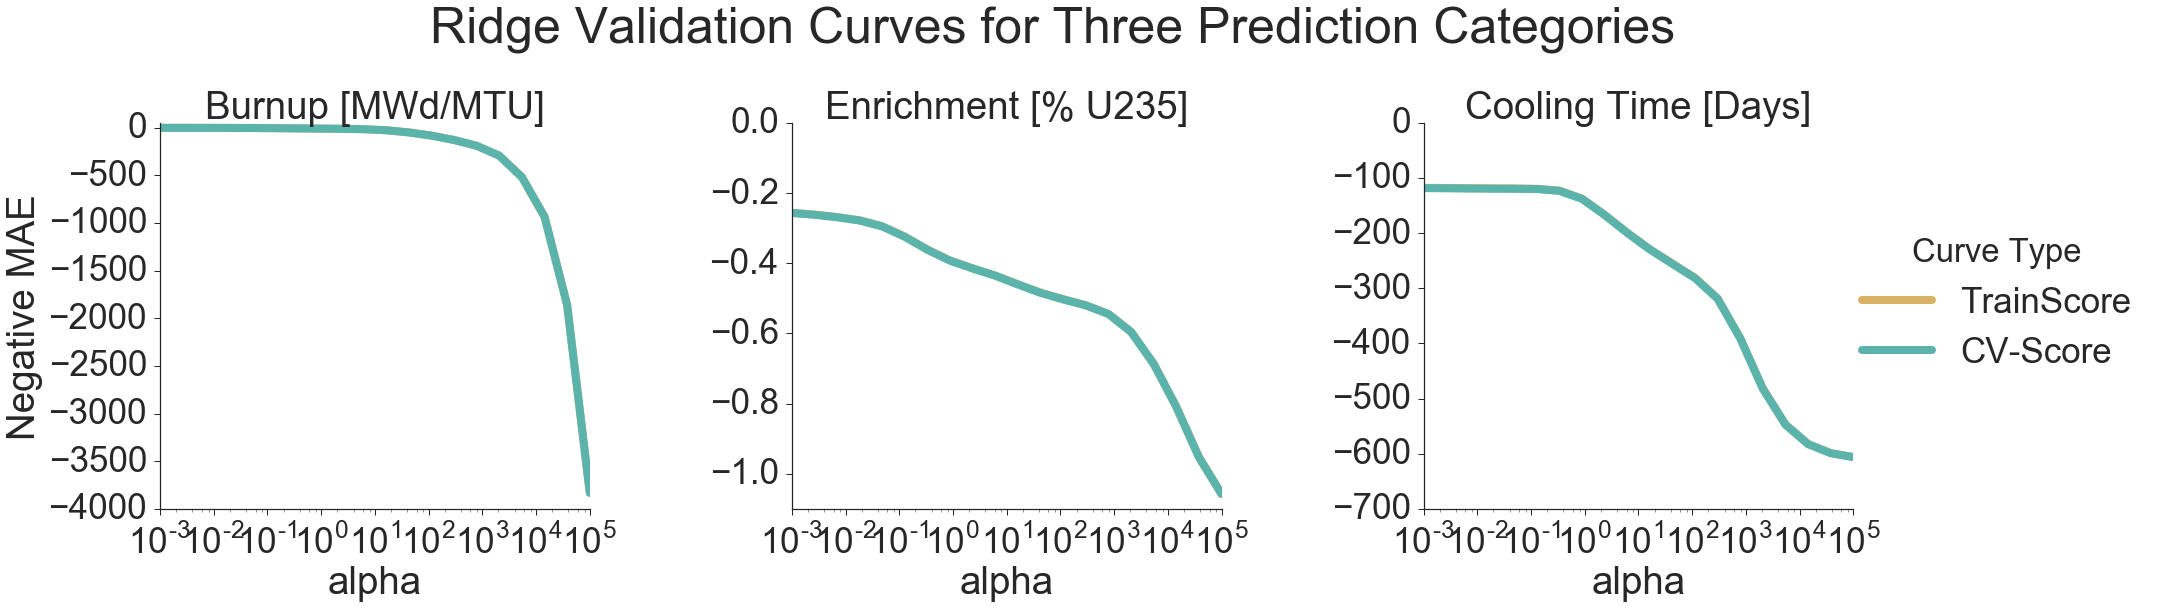

In [132]:
rr_b = burn_vc.loc[(burn_vc['Algorithm']=='rr') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
rr_e = enri_vc.loc[(enri_vc['Algorithm']=='rr') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
rr_c = cool_vc.loc[(cool_vc['Algorithm']=='rr') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

plt.clf()
sns.set(style="ticks", font_scale=3.5)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('alpha', 'Negative MAE')
   .set(xscale="log")
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-4000, 50)
vc.axes[0,1].set_ylim(-1.1, 0)
vc.axes[0,2].set_ylim(-700, 0)

vc.savefig('../results/2jul2018/graphs/2rr_fissact_validation_mae.png', bbox_inches='tight', transparent=True)

## SVR
### Explained Variance/Accuracy

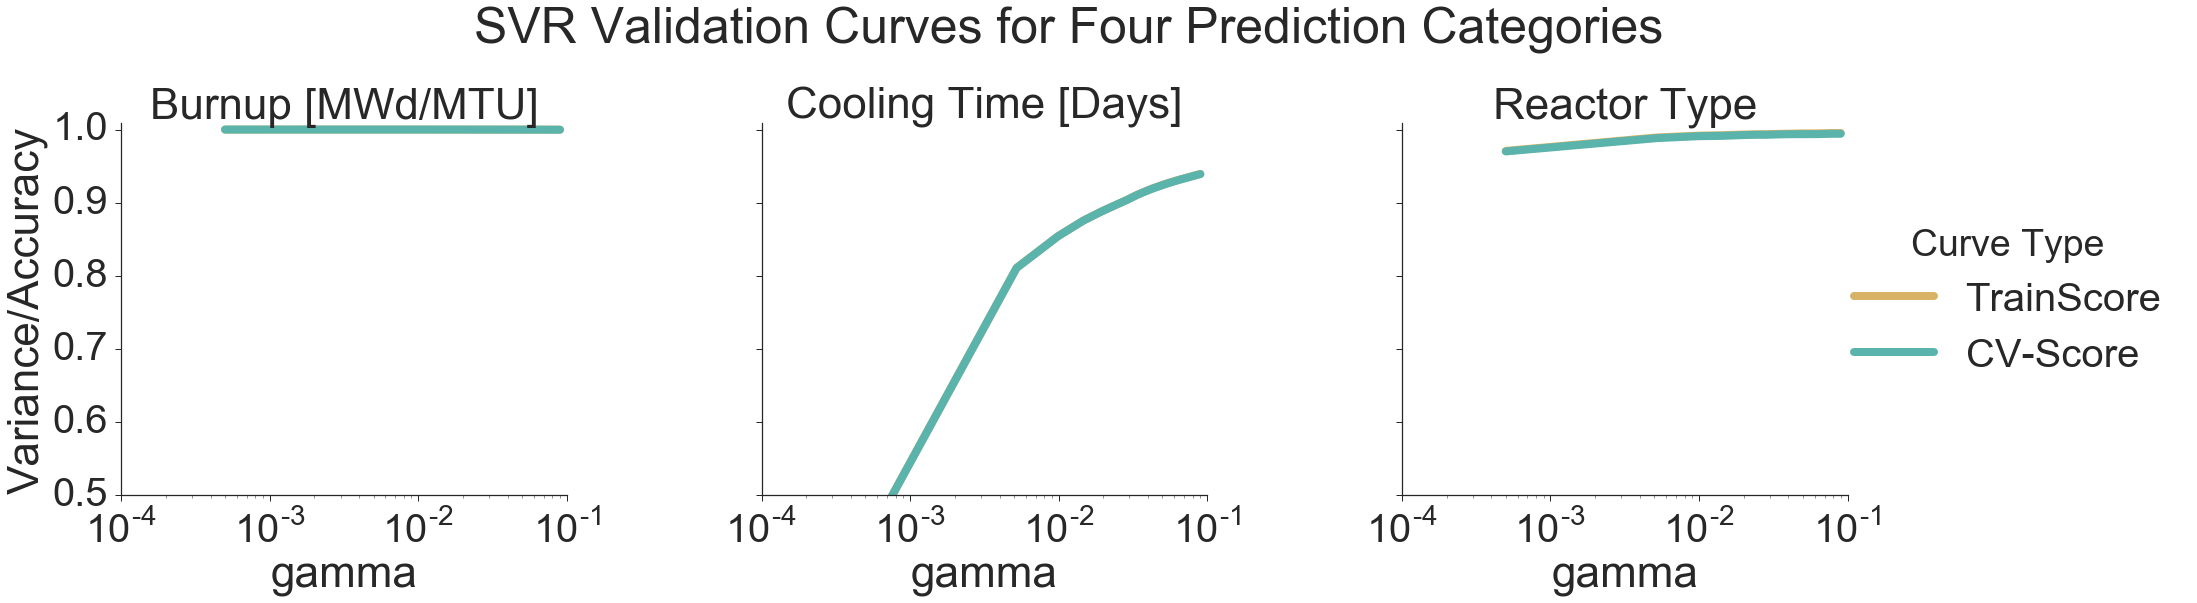

In [138]:
svr_b = burn_vc.loc[(burn_vc['Algorithm']=='svr') & (burn_vc['ScoringMetric']=='explained_variance')]
svr_e = enri_vc.loc[(enri_vc['Algorithm']=='svr') & (enri_vc['ScoringMetric']=='explained_variance')]
svr_c = cool_vc.loc[(cool_vc['Algorithm']=='svr') & (cool_vc['ScoringMetric']=='explained_variance')]
svr_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='svr') & (rxtr_vc['ScoringMetric']=='accuracy')]

plt.clf()

sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c, svr_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('gamma', 'Variance/Accuracy')
   .set(xscale="log")
   .set(ylim=(0.5, 1.009))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('SVR Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/2jul2018/graphs/2svr_fissact_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

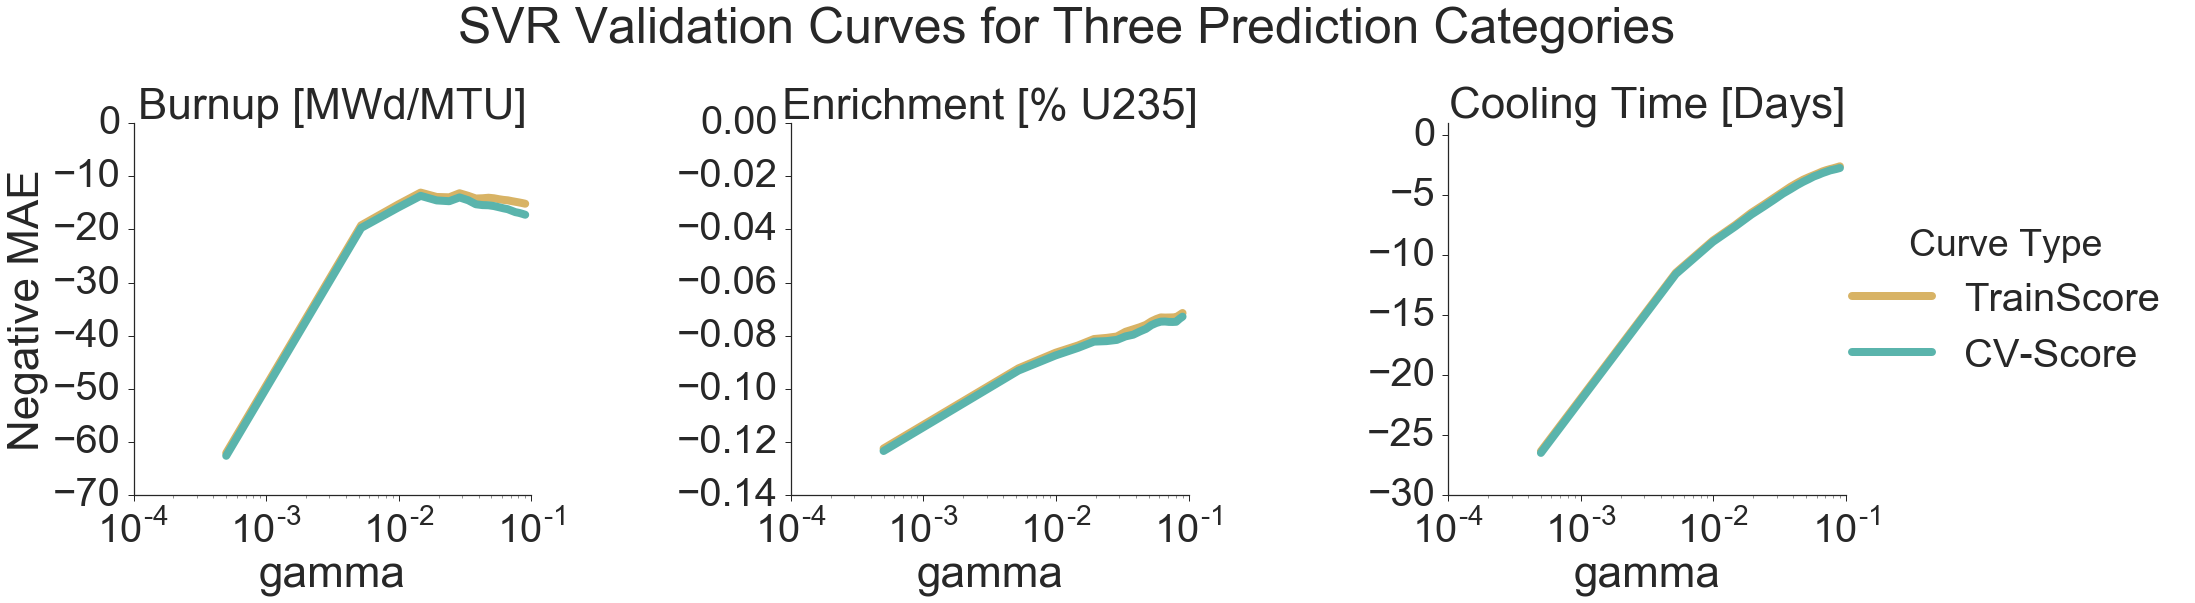

In [116]:
svr_b = burn_vc.loc[(burn_vc['Algorithm']=='svr') & (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
svr_e = enri_vc.loc[(enri_vc['Algorithm']=='svr') & (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
svr_c = cool_vc.loc[(cool_vc['Algorithm']=='svr') & (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('gamma', 'Negative MAE')
   .set(xscale="log")
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('SVR Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
vc.axes[0,0].set_ylim(-70, 0)
vc.axes[0,1].set_ylim(-0.14, 0)
vc.axes[0,2].set_ylim(-30, 1)

vc.savefig('../results/2jul2018/graphs/2svr_fissact_validation_mae.png', bbox_inches='tight', transparent=True)